<a href="https://colab.research.google.com/github/Mithilesh0079/Data-Structures-and-Algorithms-Algorithmic-Toolbox-week2/blob/master/animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import cv2 
import os
print("Numpy Version is ", np.__version__)

Numpy Version is  1.18.3


#### Classes
Bear 1, Elephant 2, giraffe 3, zebra 4, other 5

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# reading data from drive
X1 = np.load('gdrive/My Drive/COCO/X_data_1100perclass.npy')
y1=  np.load('gdrive/My Drive/COCO/Y_data_1100perclass.npy')

In [0]:
bbox= np.load('gdrive/My Drive/COCO/bbox_1100perclass.npy', allow_pickle=True)

In [5]:
print(X1.shape)
print(y1.shape)
print(bbox.shape)

(5354, 224, 224, 3)
(5354, 5)
(5354,)


In [7]:
pip install d2l

In [8]:
pip install mxnet

     |████████████████████████████████| 68.7MB 45kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
import random
import d2l
from mxnet import image, npx
npx.set_np()

In [0]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

[[79.25568000000001, 50.3364776119403, 49.916160000000005, 147.99379104477615]]
1


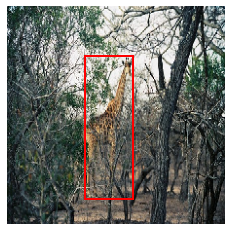

[[164.46850000000003, 129.83081967213116, 5.3445, 15.832131147540982], [35.4795, 127.44918032786885, 13.044500000000003, 19.35737704918033], [82.999, 132.03409836065575, 18.781, 16.96], [139.56249999999997, 129.31672131147542, 13.201999999999998, 18.47606557377049], [126.8365, 130.08786885245902, 12.3725, 15.622295081967213], [151.22449999999998, 130.60196721311476, 13.163499999999999, 16.818360655737706], [195.31749999999997, 130.68590163934428, 15.722, 18.481311475409836], [89.31300000000002, 125.66557377049183, 5.2395000000000005, 8.020983606557378], [169.4525, 128.73967213114753, 6.986, 18.63344262295082], [173.85899999999998, 130.91147540983607, 7.672, 13.062295081967212], [67.8125, 122.91672131147543, 5.7505, 13.120000000000001], [99.12700000000001, 126.97704918032787, 4.1685, 13.801967213114754]]
12


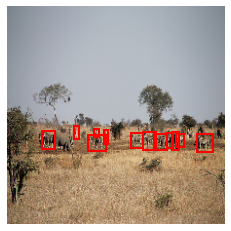

[[62.29299999999999, 50.83866666666667, 161.707, 128.86533333333333]]
1


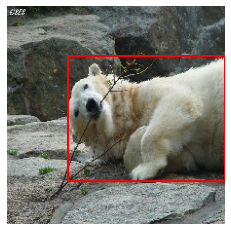

[[27.4365, 105.322, 55.489, 62.43533333333333], [0.0, 104.72, 52.339, 59.03333333333333], [158.5605, 91.61133333333335, 65.4395, 98.15866666666668], [109.62700000000001, 99.69866666666667, 18.5885, 89.17066666666668], [133.2625, 113.66133333333333, 29.690499999999997, 85.26466666666667], [179.78799999999998, 97.64066666666666, 39.8125, 17.061333333333334], [75.4915, 117.50666666666667, 18.035500000000003, 56.77], [74.3715, 94.63533333333334, 43.0395, 79.02533333333334], [142.723, 106.03133333333334, 36.151500000000006, 49.29866666666667]]
9


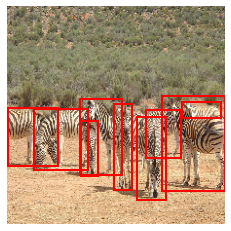

[[0.0, 47.81933333333333, 157.052, 111.748]]
1


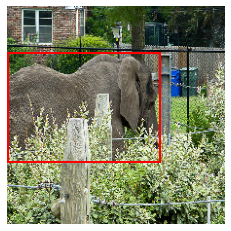

[[159.66719999999998, 81.64900900900899, 62.805119999999995, 76.1398198198198], [17.969279999999998, 120.87255255255258, 71.10208, 63.950990990990995]]
2


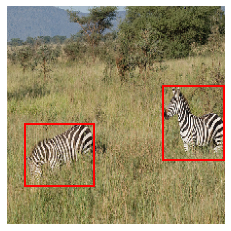

[[97.94049999999997, 64.71344262295082, 85.526, 114.90622950819672], [45.1045, 57.767868852459024, 92.2285, 77.69180327868852]]
2


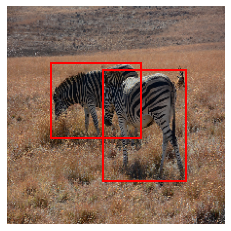

[[89.348, 121.47806167400881, 31.43, 34.77920704845815], [162.01149999999996, 131.1929515418502, 37.0755, 34.91735682819383], [77.66149999999999, 124.01409691629956, 13.125, 31.369867841409693], [49.990500000000004, 117.78748898678413, 28.924, 35.74132158590308], [126.329, 126.21955947136564, 26.348000000000003, 34.76440528634361], [72.681, 131.31629955947133, 5.614, 10.44511013215859]]
6


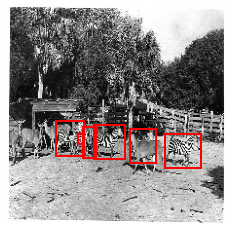

[[12.89344, 54.482773333333334, 187.34016, 152.70229333333333]]
1


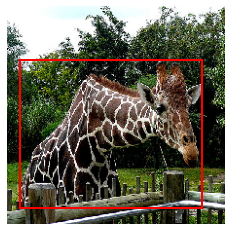

[[83.685, 128.45466666666667, 25.424, 23.034666666666666], [53.07750000000001, 123.28866666666667, 18.536, 15.647333333333334], [31.776500000000006, 125.69666666666669, 32.5675, 25.158], [159.075, 141.83399999999997, 32.707499999999996, 24.196666666666665], [67.9875, 124.76333333333335, 29.778, 24.672666666666665], [29.7955, 121.08600000000003, 21.5285, 13.804], [213.493, 140.25200000000004, 10.507, 21.247333333333337], [112.721, 132.44933333333333, 30.177, 24.481333333333335]]
8


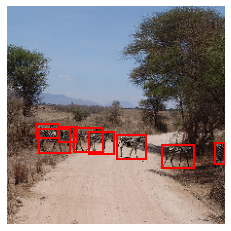

[[12.46, 54.866, 181.9685, 166.61866666666668], [50.21100000000001, 31.747333333333337, 145.348, 186.7506666666667], [27.936999999999998, 0.0, 23.407999999999998, 58.38933333333333], [53.900000000000006, 0.0, 18.333000000000002, 37.846666666666664]]
4


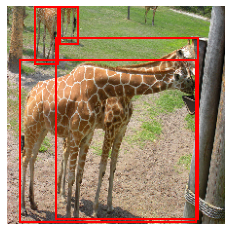

[[129.248, 133.09377049180327, 36.2215, 36.4327868852459], [44.330999999999996, 133.3927868852459, 33.25, 41.77836065573771], [21.8295, 104.8288524590164, 33.586, 37.24590163934426]]
3


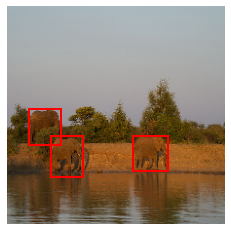

[[11.088, 85.05313432835821, 77.39648, 112.50149253731344], [129.46304, 90.55617910447761, 90.24959999999999, 106.45014925373133]]
2


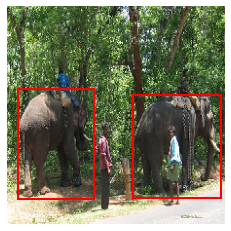

[[92.94250000000001, 122.37251764705883, 42.049, 41.158023529411764]]
1


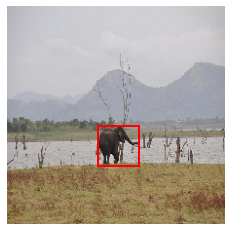

[[64.83400000000002, 98.47039999999998, 33.5125, 35.99284705882353], [156.7125, 87.72367058823528, 30.065000000000005, 48.93214117647059]]
2


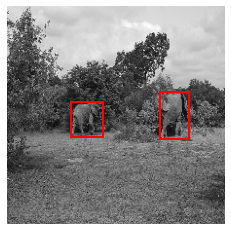

[[87.35300000000001, 87.95733333333332, 116.69350000000001, 106.58666666666666], [16.9225, 52.696, 13.5975, 27.412], [23.953999999999997, 53.10200000000001, 22.3265, 25.704], [56.3745, 58.664666666666655, 22.582, 29.502666666666663]]
4


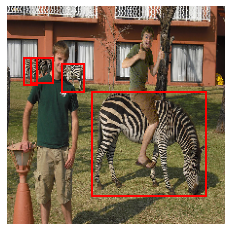

[[15.459500000000002, 73.81508196721312, 124.70150000000001, 106.85901639344262]]
1


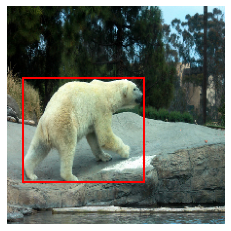

[[80.4125, 111.244, 103.8205, 58.394]]
1


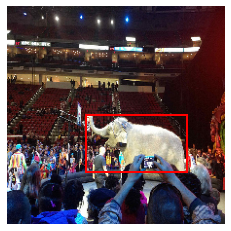

[[70.2205, 71.47933333333333, 47.1905, 87.08466666666666], [93.639, 52.92, 45.766, 100.06733333333334], [117.17299999999999, 60.70866666666667, 9.107, 78.44200000000001]]
3


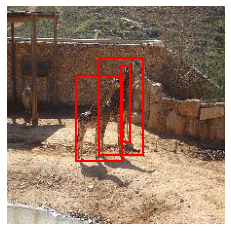

[[121.19295999999999, 2.5088000000000004, 56.049279999999996, 64.29098666666667], [0.0, 0.7586133333333334, 37.45728, 51.96202666666666]]
2


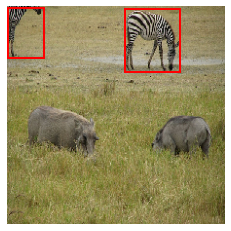

In [12]:
for j in range(20):
  n= random.randint(0,4000)
  plt.show()
  plt.axis('off')
  fig = d2l.plt.imshow(X1[n])
  print(bbox[n])
  print(len(bbox[n]))
  for i in range((len(bbox[n]))):
    fig.axes.add_patch(bbox_to_rect(bbox[n][i], 'red'))
        

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(imdata, y, test_size = 0.15, random_state =5)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.15, random_state =5)

In [15]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
%matplotlib inline
import keras.backend as K

Using TensorFlow backend.


In [0]:
X_train = preprocess_input(X_train)
X_test1 = preprocess_input(X_test)

In [17]:
from keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
model = Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 24,114,565
Trainable params: 24,060,933
Non-trainable params: 53,632
_________________________________________________________________


In [0]:
import keras
opt= keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=10,validation_split=0.15,batch_size=75)

Train on 3867 samples, validate on 683 samples
Epoch 1/10
3867/3867 [==============================] - 151s 39ms/step - loss: 0.6047 - accuracy: 0.8092 - val_loss: 0.4798 - val_accuracy: 0.8477
Epoch 2/10
3867/3867 [==============================] - 144s 37ms/step - loss: 0.1294 - accuracy: 0.9646 - val_loss: 0.2930 - val_accuracy: 0.9165
Epoch 3/10
3867/3867 [==============================] - 144s 37ms/step - loss: 0.0943 - accuracy: 0.9710 - val_loss: 0.2920 - val_accuracy: 0.9253
Epoch 4/10
3867/3867 [==============================] - 144s 37ms/step - loss: 0.0666 - accuracy: 0.9747 - val_loss: 0.3027 - val_accuracy: 0.9327
Epoch 5/10
3867/3867 [==============================] - 145s 37ms/step - loss: 0.0593 - accuracy: 0.9752 - val_loss: 0.3127 - val_accuracy: 0.9327
Epoch 6/10
3867/3867 [==============================] - 144s 37ms/step - loss: 0.0519 - accuracy: 0.9744 - val_loss: 0.3351 - val_accuracy: 0.9356
Epoch 7/10
3867/3867 [==============================] - 144s 37ms/step 

In [0]:
from keras.models import model_from_json 

In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("gdrive/My Drive/COCO/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gdrive/My Drive/COCO/model.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
scores= model.evaluate(X_test1,y_test,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.17%


In [0]:
Y_predicted= model.predict(X_test1)

In [29]:
Y_predicted.shape

(804, 5)

In [0]:
y_predicted=np.zeros([Y_predicted.shape[0],5],dtype=int)

In [0]:
for i in range(Y_predicted.shape[0]):
  m=0
  for j in range(5):
    if(m<Y_predicted[i][j]):
      m= Y_predicted[i][j]
      temp= j
  y_predicted[i][temp]=1

cat_pobability=  [7.0622691e-04 9.9118764e-04 9.2169190e-05 1.0457050e-05 9.9819994e-01]
cat predicted==  [0 0 0 0 1]
cat_actual=  [0 0 0 0 1]


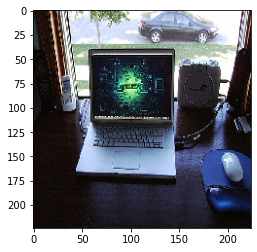

cat_pobability=  [6.72116528e-07 2.81116763e-06 1.22553365e-05 9.99984026e-01
 2.89446660e-07]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


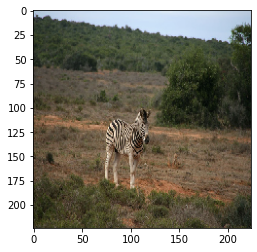

cat_pobability=  [2.2765113e-07 9.9999869e-01 6.3405986e-07 3.9947466e-07 5.3710064e-08]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


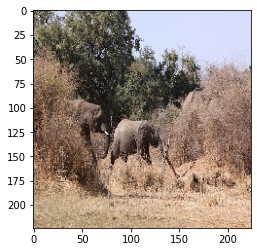

cat_pobability=  [5.7426631e-04 4.2871777e-03 9.6362752e-01 2.6176238e-02 5.3348374e-03]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


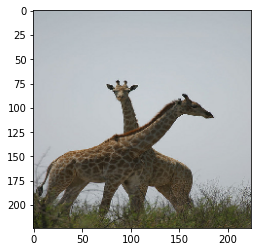

cat_pobability=  [0.3739107  0.01362864 0.15760279 0.18782558 0.26703227]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


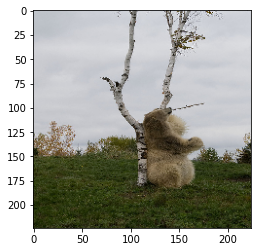

cat_pobability=  [9.9449193e-01 5.4393808e-05 1.7420807e-05 1.4160160e-03 4.0202336e-03]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


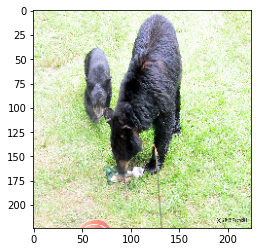

cat_pobability=  [1.5143647e-04 1.1851137e-04 5.7061558e-04 9.9915159e-01 7.8096009e-06]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


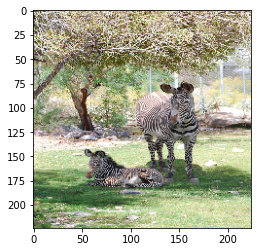

cat_pobability=  [1.4347158e-05 6.6563757e-06 1.9711669e-04 2.9997213e-05 9.9975187e-01]
cat predicted==  [0 0 0 0 1]
cat_actual=  [0 0 0 0 1]


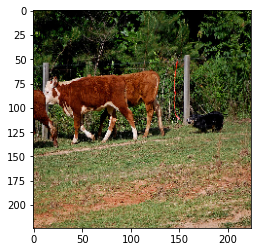

cat_pobability=  [9.9956542e-01 1.4301353e-04 6.0833663e-06 9.0576214e-06 2.7650414e-04]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


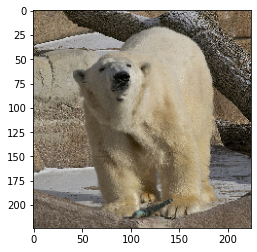

cat_pobability=  [0.33813477 0.45068815 0.1188859  0.00158745 0.09070379]
cat predicted==  [0 1 0 0 0]
cat_actual=  [1 0 0 0 0]


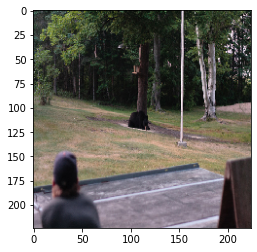

cat_pobability=  [9.9956542e-01 1.4301353e-04 6.0833663e-06 9.0576214e-06 2.7650414e-04]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


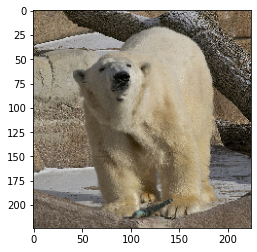

cat_pobability=  [0.81980443 0.03170507 0.02091489 0.09013478 0.03744083]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


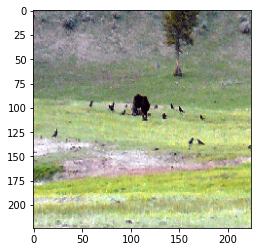

cat_pobability=  [0.3739107  0.01362864 0.15760279 0.18782558 0.26703227]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


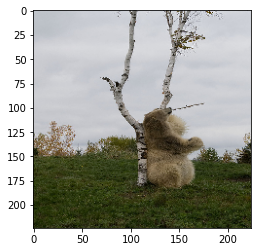

cat_pobability=  [2.4569358e-04 2.0991826e-04 6.9916758e-05 7.7429213e-06 9.9946672e-01]
cat predicted==  [0 0 0 0 1]
cat_actual=  [0 0 0 0 1]


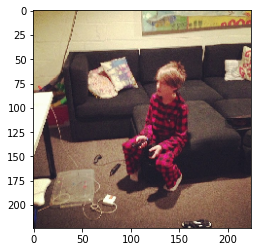

cat_pobability=  [2.0425055e-06 4.3366917e-06 8.8989204e-05 9.9990308e-01 1.4005909e-06]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


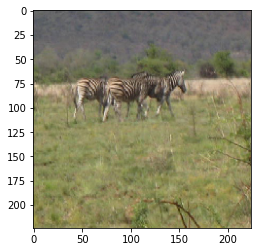

cat_pobability=  [1.1881054e-06 9.9999213e-01 3.1460818e-06 2.1268884e-06 1.4024024e-06]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


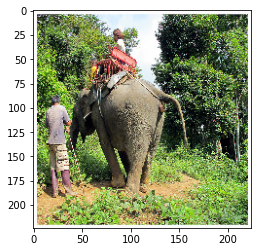

cat_pobability=  [9.9956542e-01 1.4301353e-04 6.0833663e-06 9.0576214e-06 2.7650414e-04]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


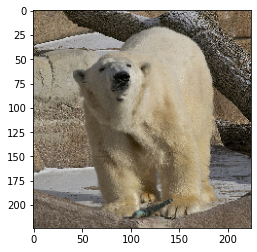

cat_pobability=  [1.13801500e-04 9.99757707e-01 1.08539534e-04 7.62812351e-06
 1.22980427e-05]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


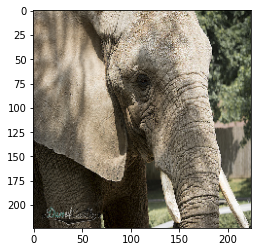

cat_pobability=  [7.4610000e-07 4.9208288e-06 1.0635371e-06 9.9999321e-01 2.0074662e-08]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


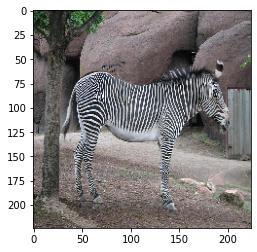

cat_pobability=  [2.2637474e-04 6.4325424e-05 9.9466264e-01 4.9958285e-03 5.0797014e-05]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


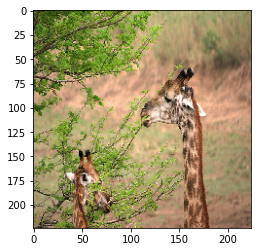

In [32]:
import random
for i in range(20):
  n= random.randint(0,len(X_test))
  plt.imshow(X_test[n])
  print("cat_pobability= ",Y_predicted[n])
  print("cat predicted== ", y_predicted[n])
  print("cat_actual= ", y_test[n])
  plt.show()

In [33]:
# load json and create model
json_file = open('gdrive/My Drive/COCO/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("gdrive/My Drive/COCO/model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test1, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 90.17%


In [0]:
Y_predicted= loaded_model.predict(X_test1)

In [0]:
Y_predicted.shape

(744, 5)

In [0]:
y_predicted=np.zeros([Y_predicted.shape[0],5],dtype=int)

In [0]:
for i in range(Y_predicted.shape[0]):
  m=0
  for j in range(5):
    if(m<Y_predicted[i][j]):
      m= Y_predicted[i][j]
      temp= j
  y_predicted[i][temp]=1

cat_pobability=  [3.7712429e-08 9.9999893e-01 9.1291417e-07 1.0760210e-07 2.4062315e-08]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


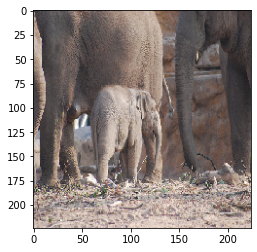

cat_pobability=  [9.8601776e-01 3.9480673e-04 8.0522317e-05 1.0198122e-03 1.2487096e-02]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


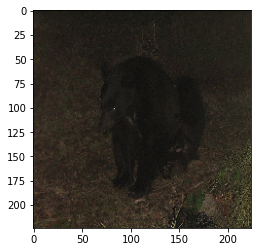

cat_pobability=  [0.6947155  0.00486539 0.01891316 0.16044807 0.12105785]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


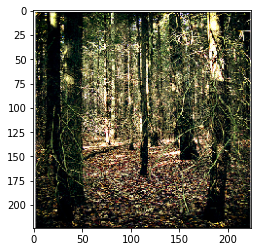

cat_pobability=  [0.0026503  0.00110673 0.004343   0.98548526 0.00641481]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


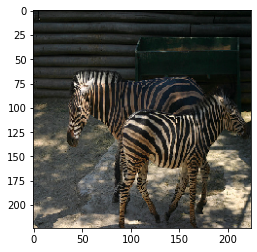

cat_pobability=  [1.2269255e-04 9.9916101e-01 4.5249483e-04 1.2511338e-04 1.3879412e-04]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


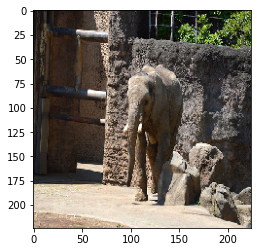

cat_pobability=  [7.0980156e-04 4.0588902e-06 9.9866521e-01 6.1710988e-04 3.7986454e-06]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


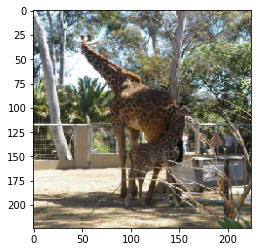

cat_pobability=  [6.0270006e-05 1.9704536e-05 1.4411645e-04 9.9965560e-01 1.2037821e-04]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


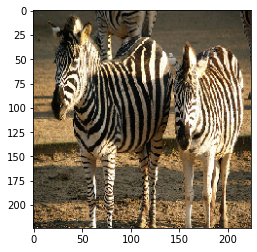

cat_pobability=  [1.3223532e-04 2.9281458e-07 9.9981755e-01 1.4556631e-05 3.5387209e-05]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


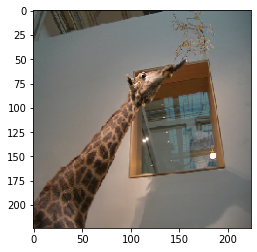

cat_pobability=  [4.4386951e-07 9.9997139e-01 1.5647762e-05 8.8260649e-06 3.7222701e-06]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


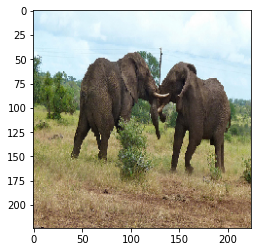

cat_pobability=  [2.3335047e-06 1.9055447e-08 2.9202547e-06 9.9998522e-01 9.5058076e-06]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


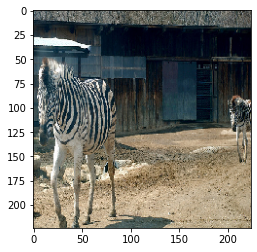

cat_pobability=  [0.00102666 0.9557836  0.03415488 0.00778133 0.00125339]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


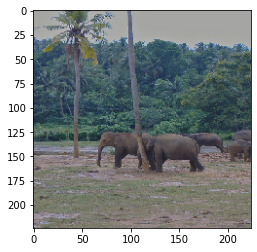

cat_pobability=  [2.5590956e-05 1.5400336e-07 9.9864691e-01 1.3266149e-03 7.2513546e-07]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


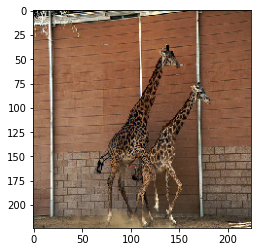

cat_pobability=  [0.00678738 0.0117105  0.97248185 0.00408093 0.00493934]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 1 0 0 0]


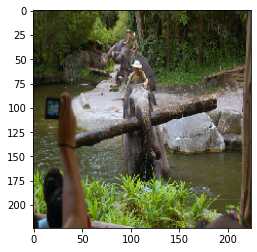

cat_pobability=  [9.4954800e-03 8.4066334e-05 9.8906171e-01 9.8938751e-04 3.6945159e-04]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


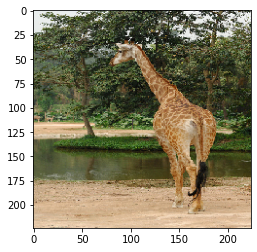

cat_pobability=  [9.9001211e-01 1.6950116e-03 1.5499209e-04 4.5923078e-03 3.5456920e-03]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


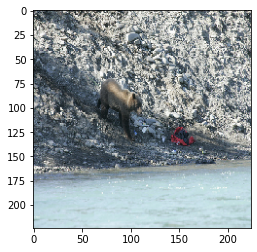

cat_pobability=  [1.7272587e-05 9.9936205e-01 1.0963055e-05 9.9774486e-05 5.0986756e-04]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


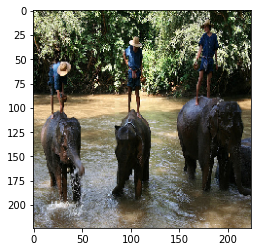

cat_pobability=  [2.4725653e-03 1.2414168e-03 6.4071472e-04 9.9559242e-01 5.2953321e-05]
cat predicted==  [0 0 0 1 0]
cat_actual=  [0 0 0 1 0]


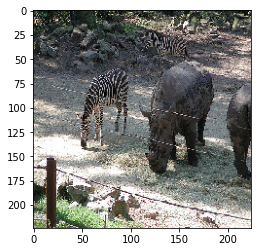

cat_pobability=  [5.3793967e-05 3.7404760e-07 9.9972612e-01 2.1677585e-04 2.8210709e-06]
cat predicted==  [0 0 1 0 0]
cat_actual=  [0 0 1 0 0]


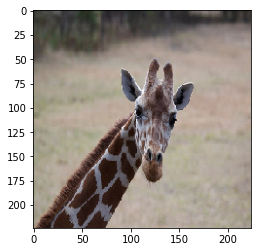

cat_pobability=  [9.9997473e-01 3.2418629e-07 1.3331525e-06 1.0774802e-06 2.2557233e-05]
cat predicted==  [1 0 0 0 0]
cat_actual=  [1 0 0 0 0]


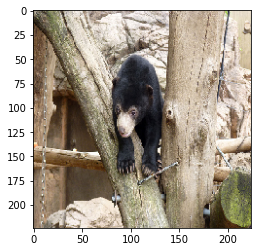

cat_pobability=  [6.0288863e-07 9.9966609e-01 3.2442907e-04 4.1717067e-06 4.7974031e-06]
cat predicted==  [0 1 0 0 0]
cat_actual=  [0 1 0 0 0]


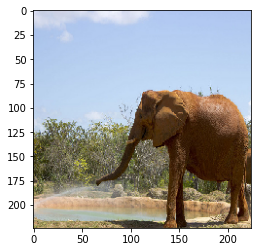

In [0]:
import random
for i in range(20):
  n= random.randint(0,len(X_test))
  plt.imshow(X_test[n])
  print("cat_pobability= ",Y_predicted[n])
  print("cat predicted== ", y_predicted[n])
  print("cat_actual= ", y_test[n])
  plt.show()